# Projet IDS - Dataset IOT devices

**Dataset** : Advancing Realistic IDS Approaches against DoS and Spoofing Attack in IoV CAN bus

## Dataset Downloading and extraction

In [ ]:
import requests
import tarfile
import os

# URL brute du fichier tar.xz
url = "https://github.com/sali446/CICIoV2024/raw/26a888050a38de73a1490af7b5e3e1c42a61559c/CICIoV2024.tar.xz"

# Nom du fichier local
filename = "CICIoV2024.tar.xz"

# Télécharger le fichier
response = requests.get(url, stream=True)

if response.status_code == 200:
    # Écrire le contenu du fichier
    with open(filename, 'wb') as file:
        file.write(response.content)
    print(f"Fichier {filename} téléchargé avec succès.")
else:
    print(f"Échec du téléchargement. Code statut: {response.status_code}")

# Vérifier si le fichier a été téléchargé
if os.path.exists(filename):
    try:
        # Décompresser le fichier tar.xz
        with tarfile.open(filename, 'r:xz') as tar:
            tar.extractall()  # Extraction dans le répertoire courant
            print("Extraction terminée.")

        # Optionnel : Supprimer le fichier tar.xz après extraction
        os.remove(filename)
    except tarfile.ReadError:
        print(f"Erreur lors de la lecture du fichier {filename}. Le format pourrait être incorrect.")
else:
    print(f"Le fichier {filename} n'existe pas.")


Fichier CICIoV2024.tar.xz téléchargé avec succès.
Extraction terminée.


1. Load the selected dataset (e.g. into a Pandas DataFrame using appropriate functions like “pd.read csv()”
in the case of tabular/time series datasets).

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_DoS = pd.read_csv('decimal/decimal_DoS.csv')
df_Benign = pd.read_csv('decimal/decimal_benign.csv')
df_spoofing_Gas = pd.read_csv('decimal/decimal_spoofing-GAS.csv')
df_spoofing_RPM = pd.read_csv('decimal/decimal_spoofing-RPM.csv')
df_spoofing_speed = pd.read_csv('decimal/decimal_spoofing-SPEED.csv')
df_spoofing_steering = pd.read_csv('decimal/decimal_spoofing-STEERING_WHEEL.csv')
df = pd.concat([df_DoS, df_Benign, df_spoofing_Gas, df_spoofing_RPM, df_spoofing_speed, df_spoofing_steering], ignore_index=True)
df.set_index('ID', inplace=True)
df

,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
ID,,,,,,,,,,,
291,0,0,0,0,0,0,0,0,ATTACK,DoS,DoS
291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
291,14,11,4,4,3,3,8,12,ATTACK,DoS,DoS
...,...,...,...,...,...,...,...,...,...,...,...
128,132,3,2,35,24,5,138,34,ATTACK,SPOOFING,STEERING_WHEEL
128,132,3,2,35,24,5,138,34,ATTACK,SPOOFING,STEERING_WHEEL
128,132,3,2,35,24,5,138,34,ATTACK,SPOOFING,STEERING_WHEEL


## Data Cleaning

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True) ## Fait passer le df à 3000 input
df.sort_index(inplace=True)
df

,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,label,category,specific_class
ID,,,,,,,,,,,
65,96,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
71,100,44,169,92,86,74,0,0,BENIGN,BENIGN,BENIGN
118,62,128,66,128,15,255,0,0,BENIGN,BENIGN,BENIGN
119,255,255,15,255,127,255,255,255,BENIGN,BENIGN,BENIGN
125,0,0,250,80,0,63,255,255,BENIGN,BENIGN,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...
1200,255,0,128,0,128,0,24,244,BENIGN,BENIGN,BENIGN
1200,255,0,128,0,80,0,24,247,BENIGN,BENIGN,BENIGN
1200,255,0,128,0,0,0,24,252,BENIGN,BENIGN,BENIGN


## Chart

<Axes: xlabel='category', ylabel='Count'>

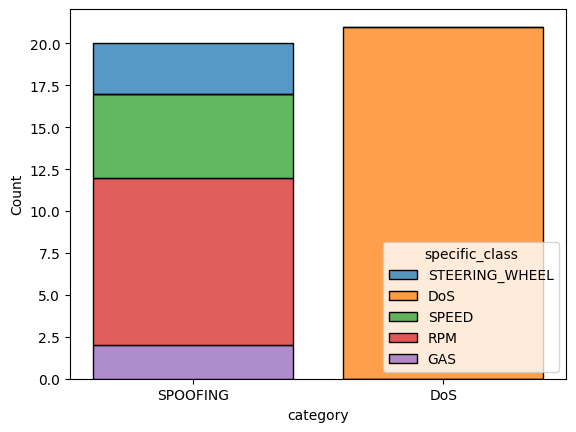

In [ ]:
value = df[df['label'] == 'ATTACK']
sns.histplot(data=value, x=value['category'], hue=value['specific_class'], multiple="stack", shrink=0.8)